In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [12, 6]

Functie die een lijst met alle posities van een karakter in een string geeft

In [2]:
def findall(string,char):
    arr=np.array([])
    for i in range(len(string)):
        if string[i]==char:
            arr=np.append(arr,[i])
    return arr

In [3]:
findall("Ik ben een dodoaapje","e")

array([  4.,   7.,   8.,  19.])

Handige functie die drie lijstjes met data geeft uit de PD-bestanden: De tijd (in minuten na het nulpunt), de locatie, en de lading.

In [4]:
def open_file(file):
    lst=np.array(open(file,"r").readlines())
    timearr=np.array([])
    placearr=np.array([])
    chargearr=np.array([])
    for i in range(1,len(lst)):
        if lst[i][19:]!=';;\n':
            fnd=findall(lst[i],";")
            timearr=np.append(timearr,[i])
            placearr=np.append(placearr,[float(lst[i][int((fnd[0]+1)):int(fnd[1])])])
            chargearr=np.append(chargearr,[float(lst[i][int(fnd[1]+1):])])
    return np.vstack((timearr,placearr,chargearr))

In [5]:
open_file("/home/geelhoed/GitHub/SCG-analyse/data/origineel/2870-pd.csv")

array([[  1.80000000e+01,   4.00000000e+01,   5.20000000e+01, ...,
          2.70013000e+05,   2.70027000e+05,   2.70033000e+05],
       [  1.74531656e+03,   5.84937946e+02,   1.52513035e+03, ...,
          5.54770593e+02,   5.07715188e+02,   1.80365014e+03],
       [  9.43000000e+02,   9.47000000e+02,   8.24000000e+02, ...,
          1.15050000e+03,   1.79050000e+03,   1.53650000e+03]])

Standaard scatterplot. Merk op hoe ik hier een optie aan toegevoegd heb om de groottes van de bolletjes af te laten hangen van de lading. 

In [6]:
def show_scatter(file,count_charges=False,fig="Scatter"):
    data=open_file(file)
    maxplace=max(data[1])
    maxtime=max(data[0])
    maxcharge=max(data[2])
    plt.figure(fig)
    plt.axis([0,maxplace,0,maxtime])
    plt.xlabel("Plaats")
    plt.ylabel("Tijd")
    plt.scatter(data[1],data[0],marker="o",s=data[2]*100/maxcharge if count_charges else 1,c="black")

<IPython.core.display.Javascript object>


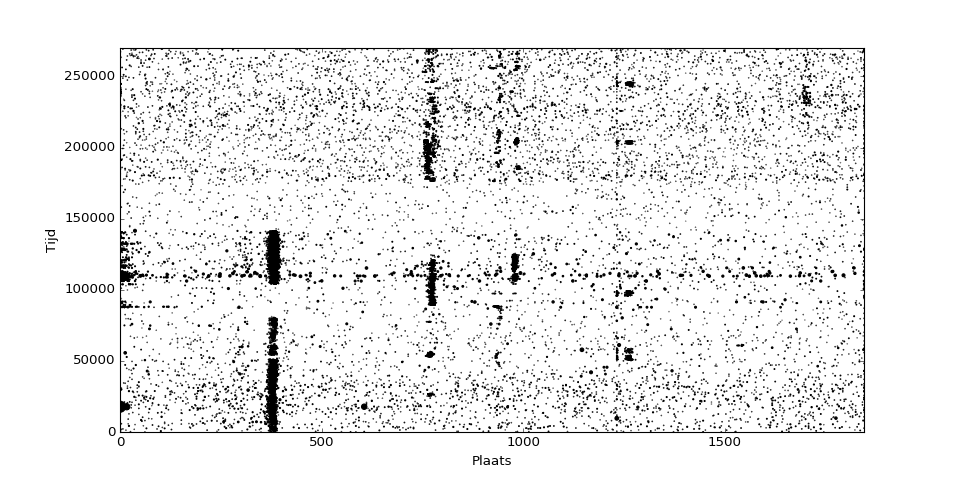

In [13]:
%matplotlib notebook
show_scatter("/home/geelhoed/GitHub/SCG-analyse/data/origineel/2870-pd.csv",True)
plt.show()

Heatmap functie, granularity geeft de fijnmazigheid van de heatmap aan. Rond de 7 vond ik het het beste en het snelste werken. Hier is te zien dat de ruis zo goed als weggehaald kan worden.

In [8]:
def show_heatmap(file,granularity=7,count_charges=False,fig="Heatmap"):
    data=open_file(file)
    boxes=2**granularity
    grid=np.zeros((boxes,boxes))
    maxplace=max(data[1])
    maxtime=max(data[0])
    for i in range(len(data[0])):
        grid[min(boxes-1,int(data[0][i]*boxes/maxtime))][min(boxes-1,int(data[1][i]*boxes/maxplace))]+=data[2][i] if count_charges else 1
    plt.figure(fig)
    plt.imshow(grid,cmap='hot',interpolation='nearest',origin="lower")

<IPython.core.display.Javascript object>


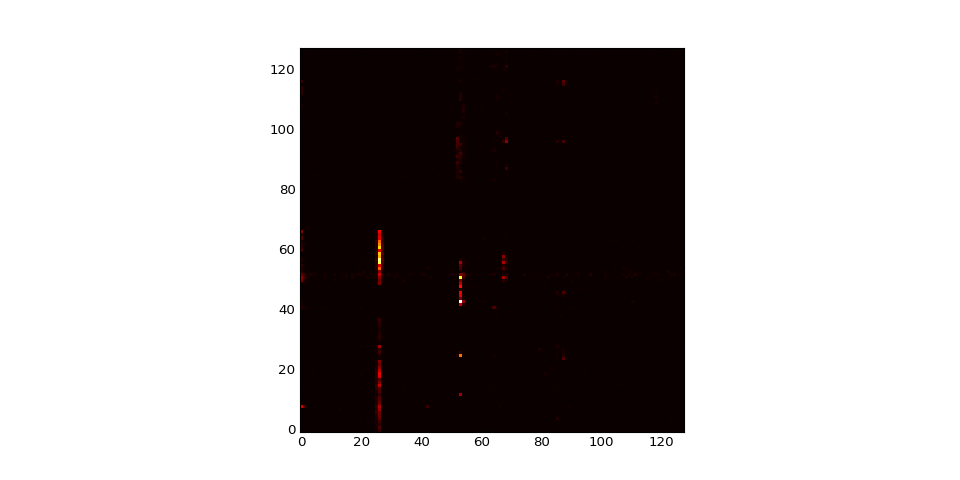

<IPython.core.display.Javascript object>


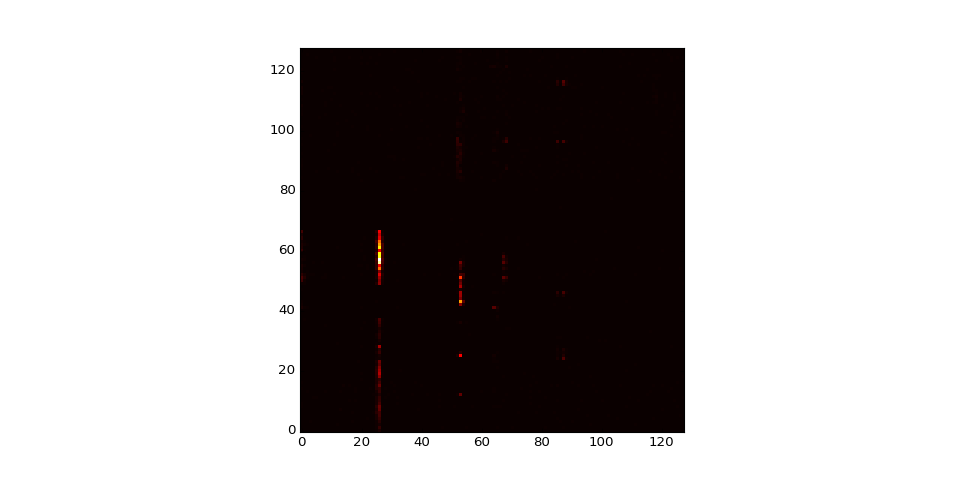

In [14]:
%matplotlib notebook
show_heatmap("/home/geelhoed/GitHub/SCG-analyse/data/origineel/2870-pd.csv",7,True,"Met ladingen")
show_heatmap("/home/geelhoed/GitHub/SCG-analyse/data/origineel/2870-pd.csv",7,False,"Zonder ladingen")
plt.show()

En als laatste nog een functie die alleen de plaats discreet maakt (een 1-dimensionale heatmap).

In [10]:
def show_locations(file,granularity=7,count_charges=False,fig="Location Graph"):
    data=open_file(file)
    boxes=2**granularity
    grid=np.zeros(boxes)
    maxplace=max(data[1])
    for i in range(len(data[1])):
        grid[min(boxes-1,int(data[1][i]*boxes/maxplace))]+=data[2][i] if count_charges else 1
    plt.figure(fig)
    plt.plot(np.linspace(0,maxplace,num=boxes),grid)

<IPython.core.display.Javascript object>


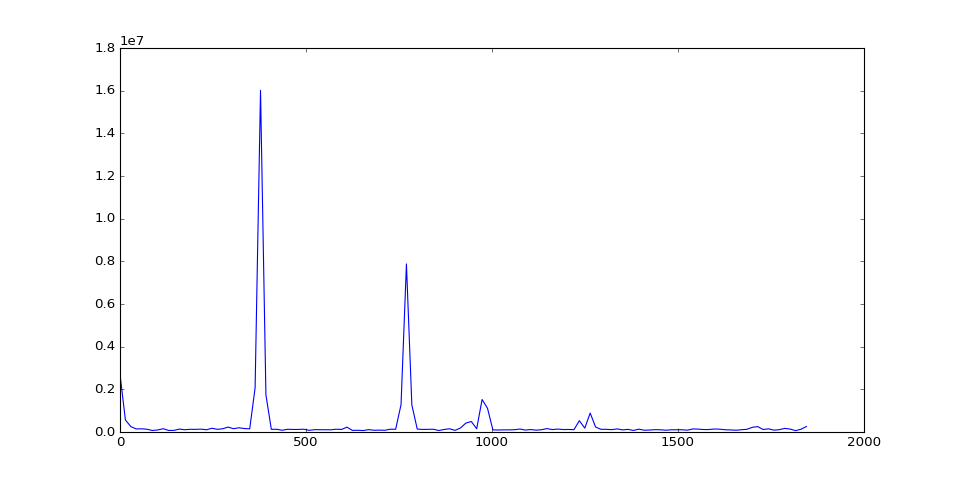

In [15]:
%matplotlib notebook
show_locations("/home/geelhoed/GitHub/SCG-analyse/data/origineel/2870-pd.csv",7,True)
plt.show()

Vergelijken we deze resultaten met de willekeurige data, dan vinden we duidelijk andere resultaten:

<IPython.core.display.Javascript object>


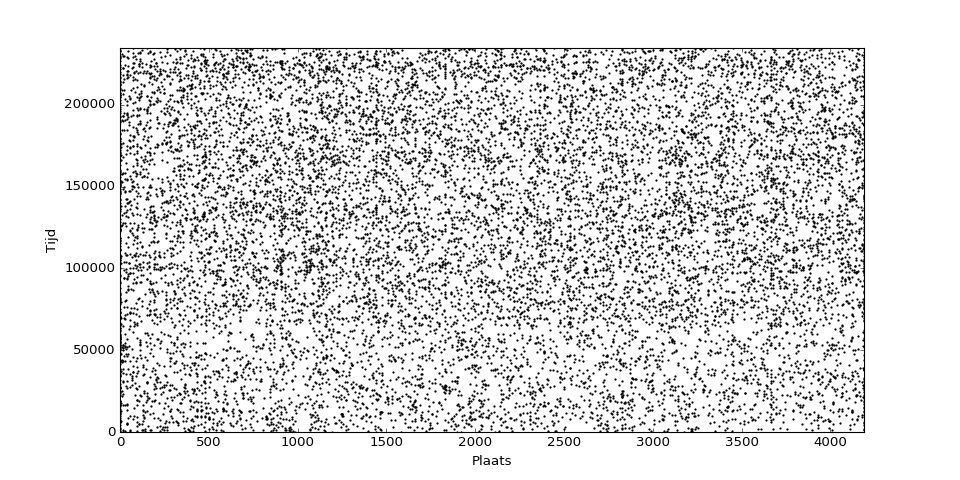

<IPython.core.display.Javascript object>


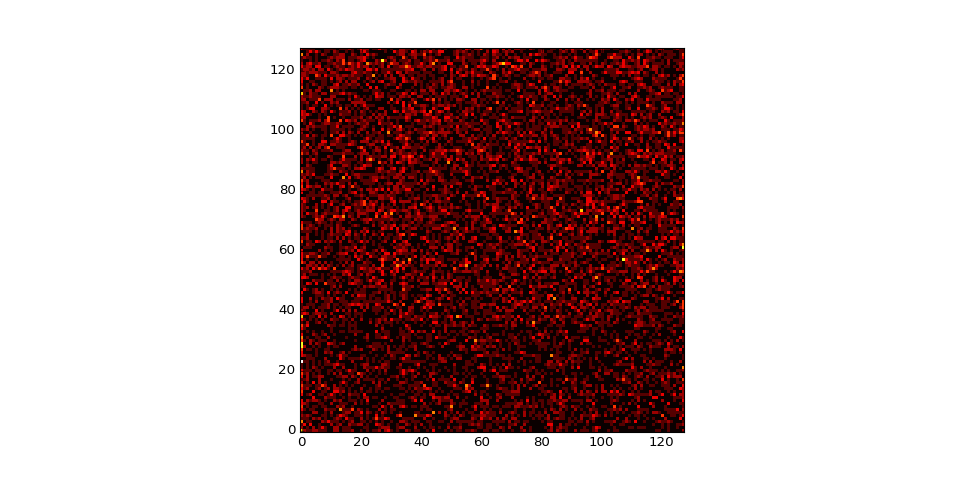

<IPython.core.display.Javascript object>


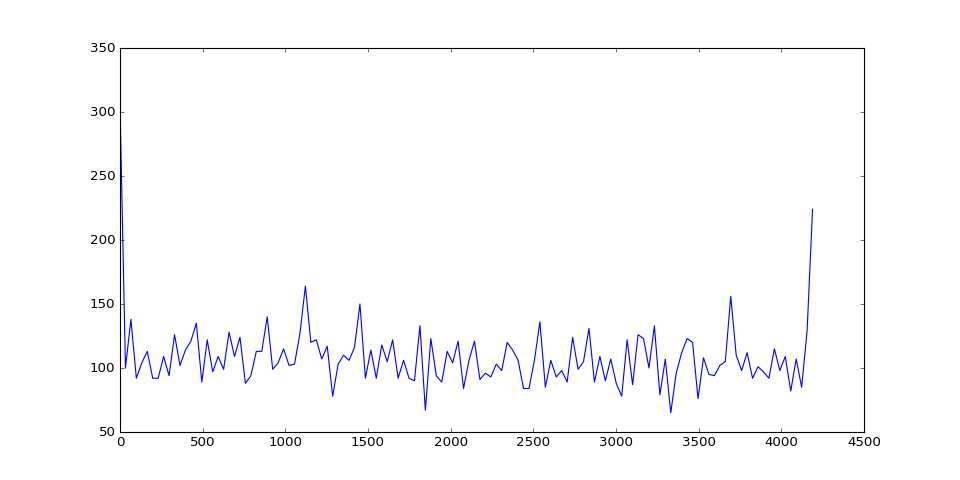

In [12]:
%matplotlib notebook
show_scatter("/home/geelhoed/GitHub/SCG-analyse/data/origineel/3010-pd.csv",False)
show_heatmap("/home/geelhoed/GitHub/SCG-analyse/data/origineel/3010-pd.csv",7,False)
show_locations("/home/geelhoed/GitHub/SCG-analyse/data/origineel/3010-pd.csv",7,False)
plt.show()